In [109]:
import pandas as pd
import numpy as np
import math
import regex as re
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [110]:
event_data=pd.read_csv('../data/athlete_events.csv')
event_data.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [111]:
def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London"or col=='Sarajevo':
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis" or col=='Squaw Valley'or col=='Salt Lake City'or col=='Lake Placid' or col=='Albertville':
        return  "United States"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "Korea, Rep."
    elif col == "Moskva"or col=='Sochi':
        return  "Russian Federation"
    elif col == "Montreal"or col=="Vancouver"or col=='Calgary':
        return  "Canada"
    elif col == "Munich" or col == "Berlin"or col=='Garmisch-Partenkirchen':
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo" or col=='Sapporo'or col=='Nagano':
        return  "Japan"
    elif col == "Roma" or col=='Torino'or col=="Cortina d'Ampezzo":
        return  "Italy"
    elif col == "Paris"or col=='Grenoble'or col=='Chamonix':
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    elif col=='Oslo' or col=='Lillehammer':
        return 'Norway'    
    elif col=='Sankt Moritz':
        return  "Switzerland"
    elif col=='Innsbruck':
        return  "Austria"
    else:
        return "Other"

In [112]:
event_data['host_country'] = event_data['City'].apply(host_country)

In [113]:
total_games=event_data.groupby("Name")['ID'].count()
total_games=total_games.to_frame(name="num_games").reset_index()
total_games=total_games.sort_values(by=['num_games'],ascending=False)

In [114]:
total_games

Name  num_games
107135      Robert Tait McKenzie         58
47116   Heikki Ilmari Savolainen         39
63766      Joseph "Josy" Stoffel         38
52174        Ioannis Theofilakis         36
118712               Takashi Ono         33
...                          ...        ...
56884         Jean H. G. Bauwens          1
56883                 Jean Gysel          1
56881               Jean Guinard          1
56879                Jean Greeff          1
67366               Karl Hohmann          1

[134732 rows x 2 columns]

In [115]:
conditions2 = [
    (event_data['Medal'] =='Gold'),
    (event_data['Medal'] =='Silver'),
    (event_data['Medal'] =='Bronze'),
    (event_data['Medal']==np.nan)
]
values2 = [1,1,1,0]
event_data['num_medals']=np.select(conditions2, values2)

In [116]:
u=event_data.groupby(['Name','Team','Sex'])['num_medals'].sum()
u=u.to_frame(name="num_medals").reset_index()
u=u.sort_values(by=['num_medals'],ascending=False)

In [117]:
joining_data = pd.merge(total_games, u,  how='inner', on='Name')
joining_data=joining_data.drop_duplicates()
joining_data=joining_data.sort_values(by=['num_medals'],ascending=False)

In [118]:
joining_data=joining_data[joining_data.num_medals>0]
joining_data=joining_data[joining_data.num_games>5]

In [119]:
import plotly.express as px
fig = px.scatter(joining_data, x="num_games", y="num_medals", hover_name='Name',color='Sex',color_discrete_sequence=['#3e76ec','#179a13'])

In [120]:
fig=fig.update_layout(
    yaxis_range=[0,32],
    autosize=False,
    height=500,
    width=900,
    
    title=("Top 10 Performing Countries <br>" +
           "<i>1924-2020</i>"),
    title_font_family="Times New Roman",
    title_font_color='White',
    paper_bgcolor='#E7E6E1',
    plot_bgcolor='#E7E6E1')



In [121]:
fig=fig.update_layout(title="Athlete Success in Olympics <br><i>By Male and Female Atheletes<i>",
        title_font_family="Times New Roman",
        paper_bgcolor='#E7E6E1',
        plot_bgcolor='#E7E6E1',
        showlegend=False)
         
fig=fig.update_layout(xaxis=dict(title='Number of Games Played',showgrid=False,title_font_color='black',tickfont=dict(family='Helvetica', size=10, color='black')),
              yaxis=dict(title='Number of Games Won',showgrid=False,title_font_color='black',tickfont=dict(family='Helvetica', size=10, color='black')),
              title_font_color='black'
              )

In [122]:
from PIL import Image
micheal = Image.open("../data/pictures/michael_phelps.png")
larysa= Image.open("../data/pictures/larisa_latynia.png")
dara=Image.open("../data/pictures/dara_grace.png")
edoardo=Image.open("../data/pictures/edoardo.png")
paavo=Image.open("../data/pictures/paavo.png")
jenny=Image.open("../data/pictures/Jennifer_Elisabeth.png")


In [123]:
##Annotating photos on the years a country has hosted
p=[30,19,14,12,13,17]
q=[28,18,13,12,12,12]
o=[micheal,larysa,edoardo,paavo,dara,jenny]

fig=fig.add_layout_image(
        x=p[0],
        y=q[0],
        source=o[0],
        xref="x",
        yref="y",
        sizex=7,
        sizey=7,
        xanchor="center",
        yanchor="middle",
    )
fig=fig.add_layout_image(
        x=p[1],
        y=q[1],
        source=o[1],
        xref="x",
        yref="y",
        sizex=5,
        sizey=5,
        xanchor="center",
        yanchor="middle",
    )

fig=fig.add_layout_image(
        x=p[2],
        y=q[2],
        source=o[2],
        xref="x",
        yref="y",
        sizex=2,
        sizey=2,
        xanchor="center",
        yanchor="middle",
    )

# fig=fig.add_layout_image(
#         x=p[3],
#         y=q[3],
#         source=o[3],
#         xref="x",
#         yref="y",
#         sizex=1,
#         sizey=1,
#         xanchor="center",
#         yanchor="middle",
#     )

fig=fig.add_layout_image(
        x=p[4],
        y=q[4],
        source=o[4],
        xref="x",
        yref="y",
        sizex=2,
        sizey=2,
        xanchor="center",
        yanchor="middle",
    )
fig=fig.add_layout_image(
        x=p[5],
        y=q[5],
        source=o[5],
        xref="x",
        yref="y",
        sizex=2,
        sizey=2,
        xanchor="center",
        yanchor="middle",
    )


In [124]:
fig=fig.add_annotation(x=60, y=28,
            text="<i>Micheal Phelps qualified for Olympics at the age of 15 and set 7 WR in 2008 Olympics alone</i>",
            showarrow=False,
            yshift=10,
            font = dict( color = 'black',
                              family = 'sans serif',
                              size = 12))
fig=fig.add_annotation(x=48, y=17,
            text="<i>Larysa Semenivna has record for the most Olympic gold medals by a gymnast, male or female</i>",
            showarrow=False,
            yshift=10,
            font = dict( color = 'black',
                              family = 'sans serif',
                              size = 12))
fig=fig.add_annotation(x=20.5, y=73,
            text="<i> Competitive Swimmer with <br>8 Gold Medals</i>",
            showarrow=False,
            yshift=10,
            font = dict( color = 'black',
                              family = 'sans serif',
                              size = 12))

fig=fig.add_layout_image(
    dict(
        source="pictures/olympic_host.png",
        xref="paper", yref="paper",
        x=1, y=0.8,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)



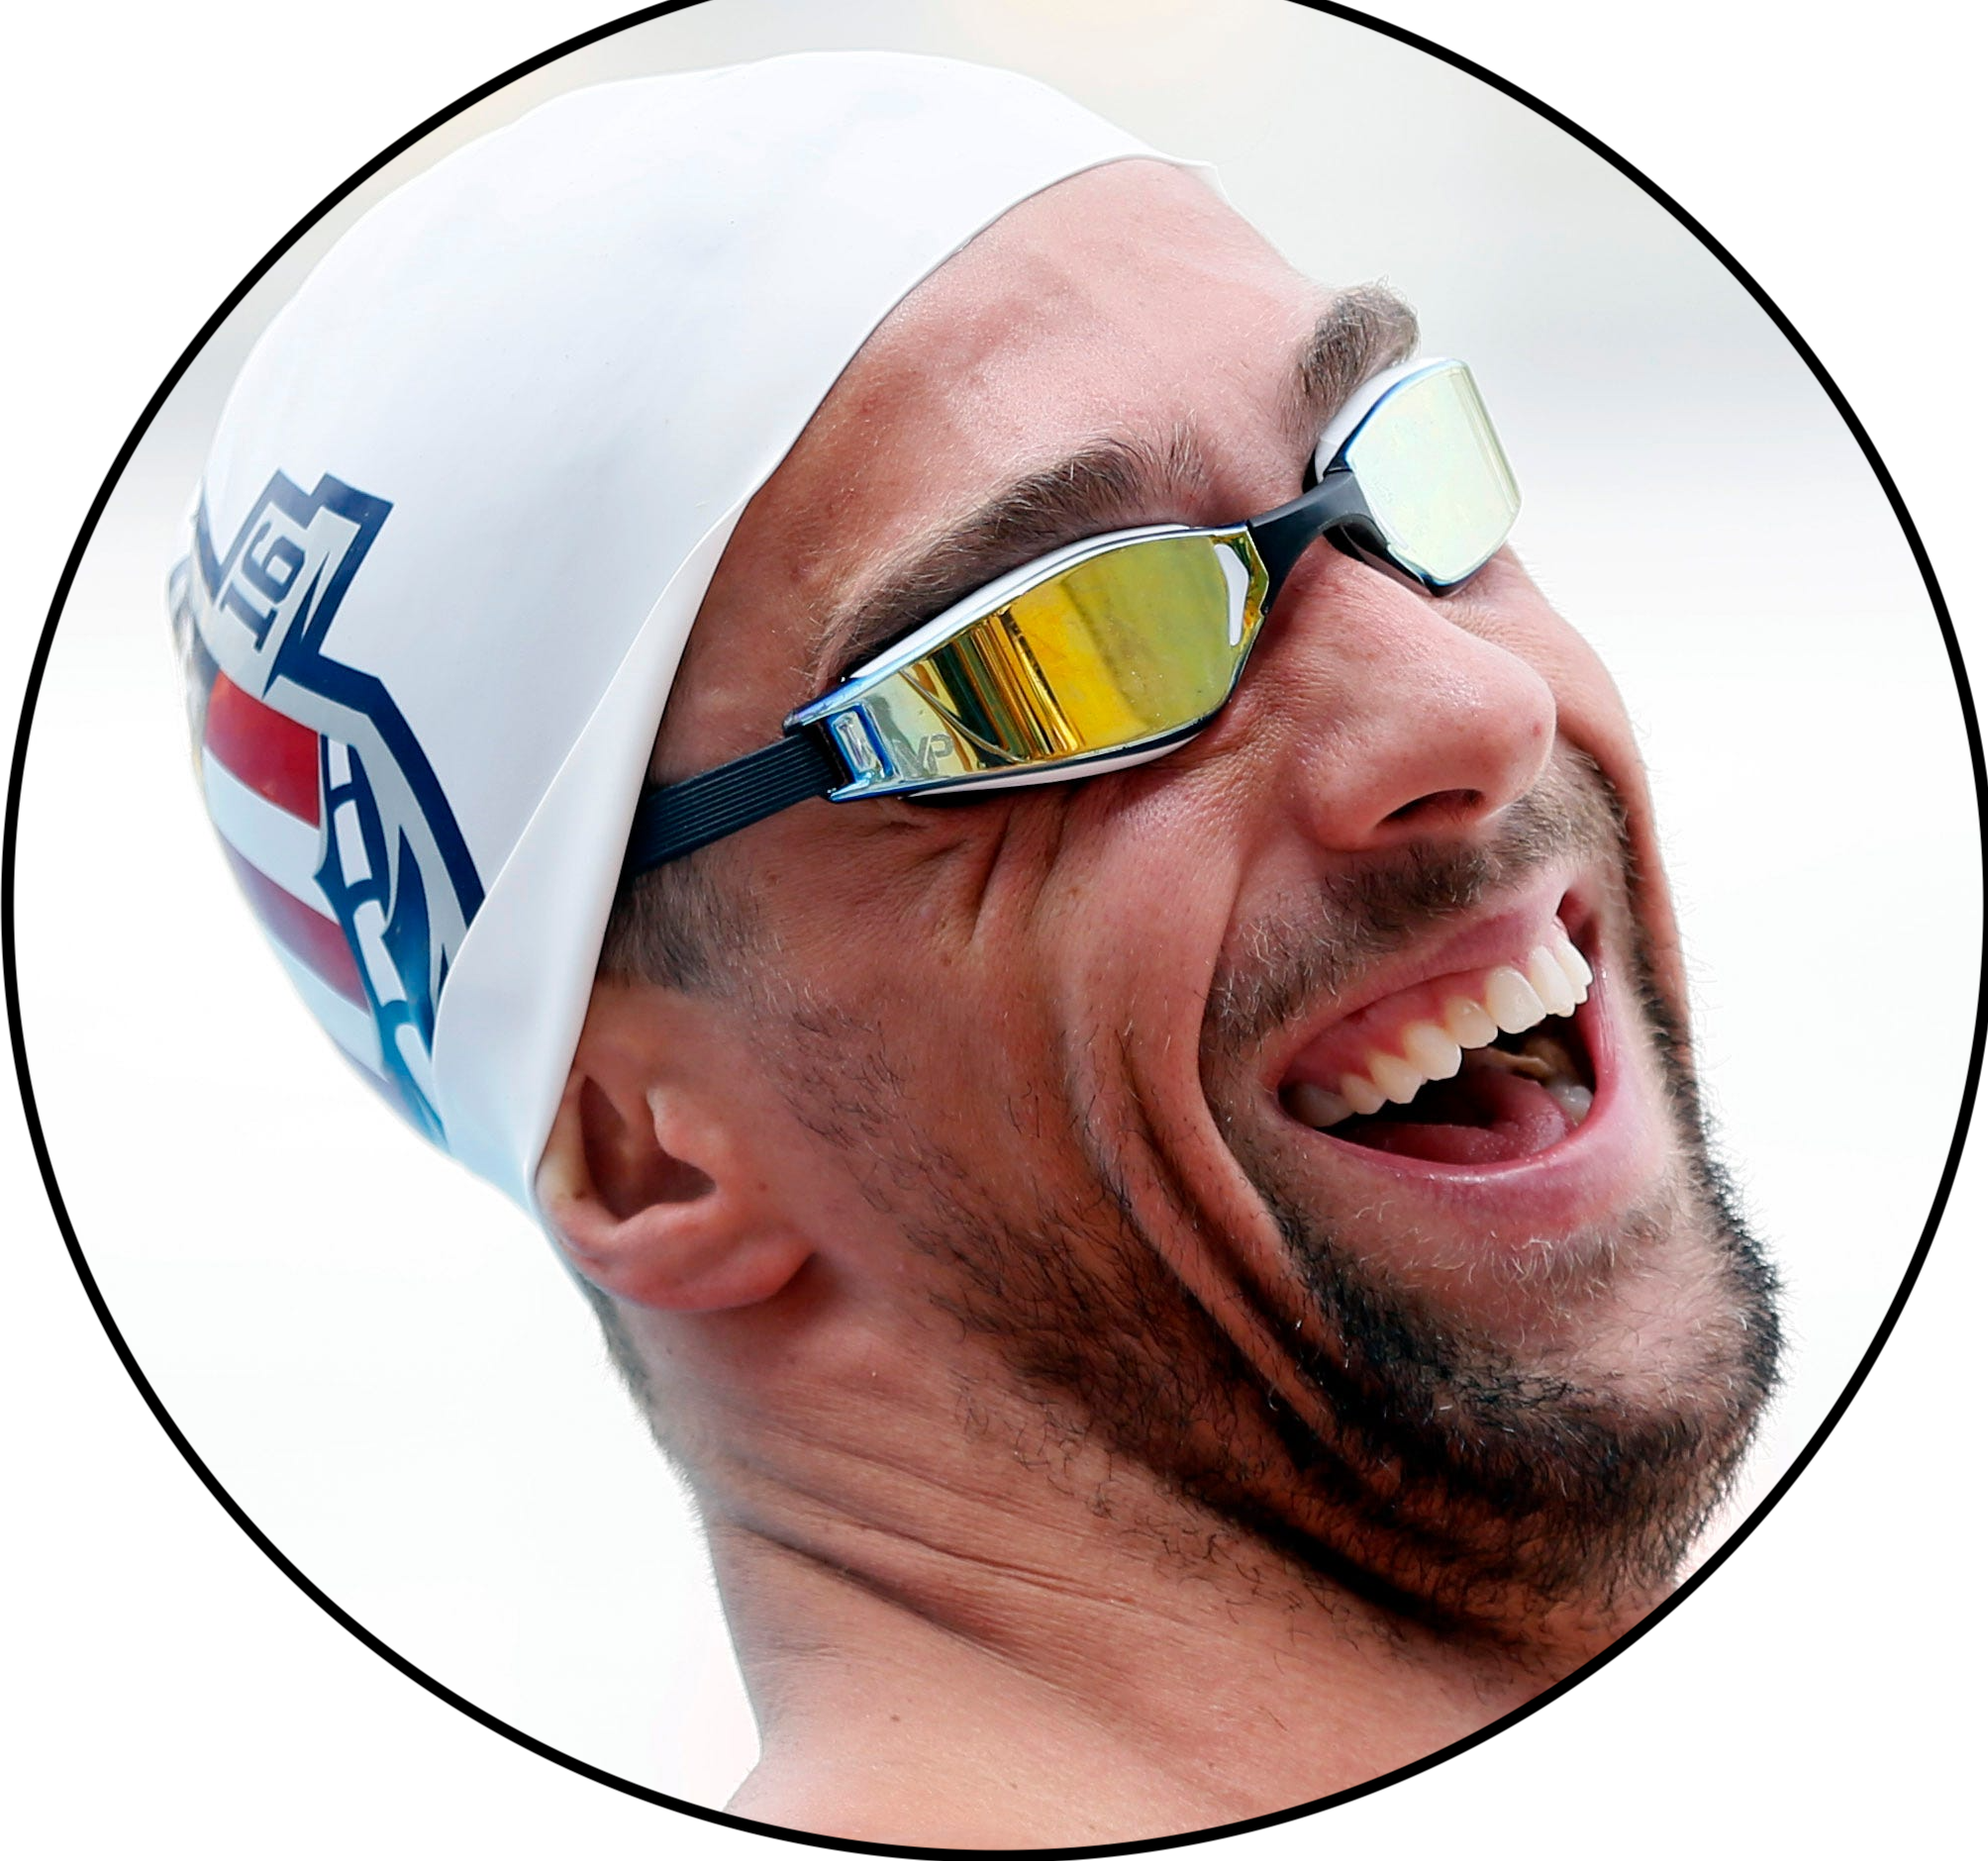
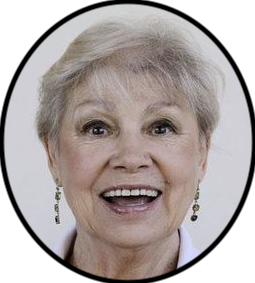
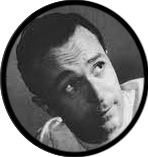
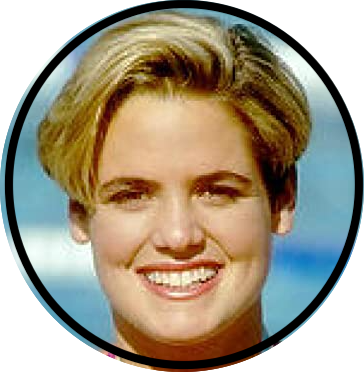
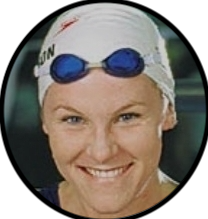

In [125]:
fig 
    


In [126]:
fig.write_html("../plots/success_ta.html")